In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from debugpy.launcher.handlers import launch_request

import map_maker_iterative.mmi_data_lib as dlib

layouts_dir = os.path.join(os.getcwd(), 'detector_layouts')
rejects_dir = os.path.join(os.getcwd(), 'kid_rejects')

In [110]:
roach = 1
layout = pd.read_csv(os.path.join(layouts_dir, f'layout_roach{roach}.csv'), index_col=0)
layout

,x,y
kid,,
0,25000,-21650.635095
1,-25000,-21650.635095
2,-30000,12990.381057
3,30000,12990.381057
4,-30000,-12990.381057
...,...,...
376,-2500,34641.016151
377,-2500,-34641.016151
378,22500,-25980.762114


In [122]:
rejects = np.astype(dlib.loadKidRejects(os.path.join(rejects_dir, f'kid_rejects_roach{roach}.dat')), int)
layout = layout[~layout.index.isin(rejects)]
layout

,x,y
kid,,
0,25000,-21650.635095
1,-25000,-21650.635095
2,-30000,12990.381057
3,30000,12990.381057
4,-30000,-12990.381057
...,...,...
376,-2500,34641.016151
377,-2500,-34641.016151
378,22500,-25980.762114


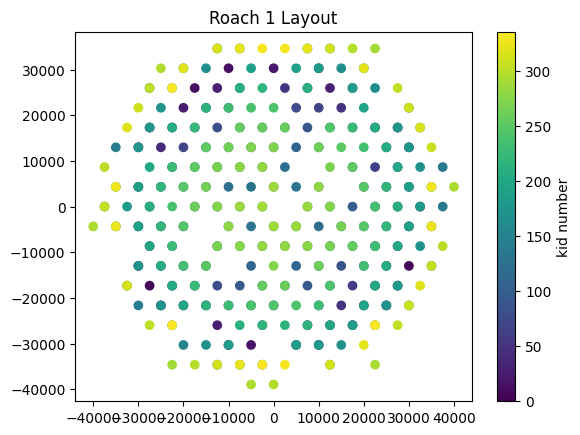

In [123]:
plt.scatter(layout['x'], layout['y'], c=range(layout.shape[0]))
plt.colorbar(label='kid number')
plt.title(f'Roach {roach} Layout')
plt.show()

In [124]:
# We want to make a square sample grid, so we discard every other row

x_vals = np.unique(layout['x'])
y_vals = np.unique(layout['y'])
print(f'{x_vals=}')
print(f'{y_vals=}')

every_other_y = y_vals[::2]

x_vals=array([-40000, -37500, -35000, -32500, -30000, -27500, -25000, -22500,
       -20000, -17500, -15000, -12500, -10000,  -7500,  -5000,  -2500,
            0,   2500,   5000,   7500,  10000,  12500,  15000,  17500,
        20000,  22500,  25000,  27500,  30000,  32500,  35000,  37500,
        40000])
y_vals=array([-38971.1431703 , -34641.01615138, -30310.88913246, -25980.76211353,
       -21650.63509461, -17320.50807569, -12990.38105677,  -8660.25403784,
        -4330.12701892,      0.        ,   4330.12701892,   8660.25403784,
        12990.38105677,  17320.50807569,  21650.63509461,  25980.76211353,
        30310.88913246,  34641.01615138])


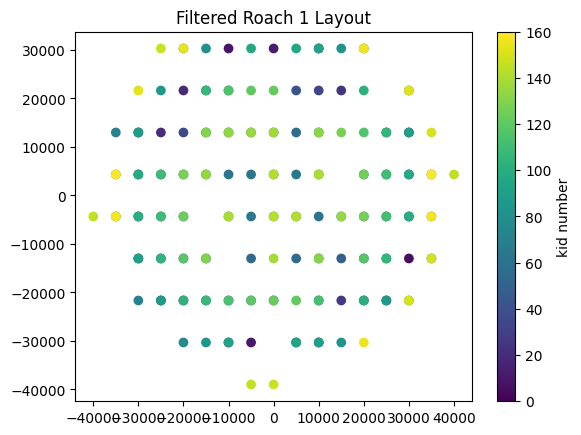

In [125]:
filtered_layout = layout[layout['y'].isin(every_other_y)]

plt.scatter(filtered_layout['x'], filtered_layout['y'], c=range(filtered_layout.shape[0]))
plt.colorbar(label='kid number')
plt.title(f'Filtered Roach {roach} Layout')
plt.show()

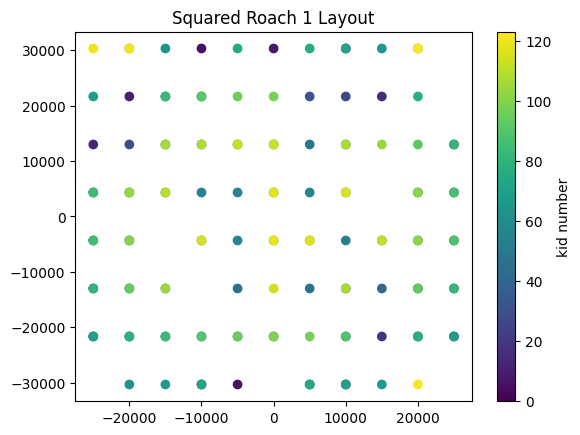

In [126]:
# crop to square
x_cropped = x_vals[(x_vals >= -25000) & (x_vals <= 25000)]
y_cropped = every_other_y[(every_other_y >= -30320) & (every_other_y <= 30320)]
square_layout = filtered_layout[filtered_layout['y'].isin(y_cropped) & filtered_layout['x'].isin(x_cropped)]

plt.scatter(square_layout['x'], square_layout['y'], c=range(square_layout.shape[0]))
plt.colorbar(label='kid number')
plt.title(f'Squared Roach {roach} Layout')
plt.show()

In [127]:
for i in square_layout.index: print(f'{i}, ', end='')

0, 1, 12, 13, 14, 15, 19, 20, 22, 27, 29, 30, 43, 44, 45, 46, 52, 53, 54, 55, 59, 60, 61, 62, 71, 72, 73, 74, 75, 76, 77, 79, 80, 82, 87, 88, 89, 90, 91, 92, 93, 108, 109, 110, 112, 113, 117, 118, 119, 120, 121, 129, 130, 131, 132, 139, 140, 141, 142, 143, 144, 171, 172, 173, 188, 189, 190, 191, 196, 197, 198, 207, 208, 209, 213, 214, 215, 220, 221, 222, 234, 235, 236, 243, 244, 249, 250, 251, 252, 259, 260, 261, 262, 264, 265, 268, 269, 270, 271, 272, 275, 276, 277, 278, 279, 280, 281, 294, 295, 296, 298, 299, 304, 305, 306, 312, 313, 320, 321, 322, 332, 364, 365, 366, 

In [128]:
def find_pairs(df: pd.DataFrame) -> list[tuple[int, int]]:

    kids = df.index

    pairs: list[tuple[int, int]] = []

    for kid1 in kids:
        for kid2 in kids:
            if kid1 >= kid2: continue
            if df['x'][kid1] == df['x'][kid2] and df['y'][kid1] == df['y'][kid2]:
                pairs.append((kid1, kid2))

    return pairs

all_pairs = find_pairs(layout)

print(f"Found {len(all_pairs)} pairs out of {layout.index.size} KIDs!")
all_pairs

Found 125 pairs out of 337 KIDs!


[(0, 197),
 (1, 198),
 (2, 199),
 (3, 200),
 (4, 201),
 (7, 202),
 (8, 203),
 (9, 204),
 (10, 205),
 (12, 207),
 (13, 208),
 (14, 209),
 (16, 210),
 (18, 212),
 (20, 213),
 (23, 216),
 (24, 217),
 (25, 218),
 (26, 219),
 (27, 220),
 (29, 222),
 (32, 224),
 (36, 227),
 (37, 228),
 (38, 229),
 (39, 230),
 (40, 231),
 (41, 232),
 (42, 233),
 (43, 234),
 (45, 235),
 (46, 236),
 (47, 237),
 (48, 238),
 (49, 239),
 (50, 240),
 (51, 242),
 (53, 243),
 (54, 244),
 (58, 248),
 (59, 249),
 (60, 250),
 (61, 251),
 (62, 252),
 (63, 253),
 (64, 254),
 (65, 255),
 (67, 256),
 (68, 257),
 (69, 258),
 (71, 259),
 (72, 260),
 (74, 261),
 (76, 264),
 (77, 265),
 (78, 266),
 (79, 268),
 (82, 272),
 (83, 273),
 (85, 274),
 (87, 275),
 (88, 276),
 (89, 277),
 (90, 278),
 (91, 280),
 (92, 281),
 (95, 283),
 (96, 284),
 (97, 285),
 (101, 287),
 (102, 288),
 (103, 289),
 (104, 290),
 (105, 291),
 (106, 292),
 (108, 294),
 (109, 295),
 (110, 296),
 (112, 298),
 (113, 299),
 (114, 300),
 (115, 301),
 (116, 302)

In [129]:
square_pairs = find_pairs(square_layout)
print(f"Found {len(square_pairs)} pairs out of {square_layout.index.size} KIDs!")
# print(square_pairs)

Found 44 pairs out of 124 KIDs!


Found 7 pairs out of 21 KIDs!


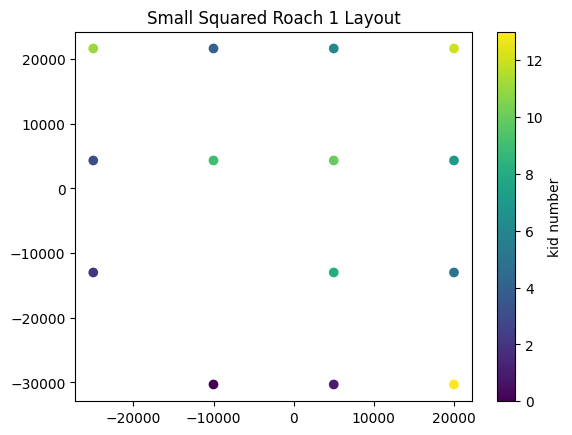

,x,y
kid,,
14,-10000,-30310.889132
20,5000,-30310.889132
43,-25000,-12990.381057
59,-25000,4330.127019
74,-10000,21650.635095
76,20000,-12990.381057
80,5000,21650.635095
88,20000,4330.127019
118,5000,-12990.381057


In [130]:
small_square = square_layout[square_layout['x'].isin(x_cropped[::3]) & square_layout['y'].isin(y_cropped[::2])]

small_square_pairs = find_pairs(small_square)
print(f"Found {len(small_square_pairs)} pairs out of {small_square.index.size} KIDs!")

duplicates = [kid_pair[1] for kid_pair in small_square_pairs]

ss_no_duplicates = small_square[~small_square.index.isin(duplicates)]

plt.scatter(ss_no_duplicates['x'], ss_no_duplicates['y'], c=range(ss_no_duplicates.shape[0]))
plt.colorbar(label='kid number')
plt.title(f'Small Squared Roach {roach} Layout')
plt.show()

ss_no_duplicates

In [101]:
ss_no_duplicates.index

Index([14, 20, 43, 59, 74, 76, 80, 88, 118, 132, 140, 196, 221, 293, 331, 365], dtype='int64', name='kid')

In [103]:
grid_4x4 = [
    [331, 43, 59, 196],
    [14, 293, 132, 74],
    [20, 118, 140, 80],
    [365, 76, 88, 221],
]

print(grid_4x4)

[[331, 43, 59, 196], [14, 293, 132, 74], [20, 118, 140, 80], [365, 76, 88, 221]]
